# Part I - (Ford GoBike System Data)
## by (Manuel Tekena)

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


## Preliminary Wrangling


In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import matplotlib.patches as mpatches
%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [4]:
#read the dataset into the dataframe
df = pd.read_csv('ford_bikes.csv')

#viewing the dataset
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
#viewing the structurew of the dataset
df.shape

(183412, 16)

In [6]:
#checking the datatype of columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [7]:
#changing start time and end time to datetime 

df['start_time']=pd.to_datetime(df['start_time'])
df['end_time']=pd.to_datetime(df['end_time'])

In [8]:
#test
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [9]:
#renaming the birth year column to age
df.rename(columns={'member_birth_year': 'age'}, inplace=True)

In [10]:
#test
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,age,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [11]:
# reforming the birthyear column to age by subtracting 2022
df['age'] = 2022 - df['age']

In [12]:
#check
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,age,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,38.0,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,50.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,33.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,48.0,Male,Yes


In [13]:
# we need to convert the duratio_sec column from seconds to hours
# we divide entire column by 3600

df['duration_sec'] = df['duration_sec'] / 3600

In [14]:
#check
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,age,member_gender,bike_share_for_all_trip
0,14.495833,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,38.0,Male,No
1,11.811389,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,17.181667,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,50.0,Male,No
3,10.136111,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,33.0,Other,No
4,0.440278,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,48.0,Male,Yes


In [15]:
# round off to 2 decimal places 
df['duration_sec'] = df['duration_sec'].round(2)

In [16]:
#check
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,age,member_gender,bike_share_for_all_trip
0,14.50,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,38.0,Male,No
1,11.81,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,17.18,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,50.0,Male,No
3,10.14,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,33.0,Other,No
4,0.44,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,48.0,Male,Yes


In [17]:
#rename column to trip_hours
df.rename(columns={'duration_sec': 'trip_hours'}, inplace=True)

In [18]:
#check
df.head(0)

,trip_hours,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,age,member_gender,bike_share_for_all_trip


### What is the structure of your dataset?

> 183412 rows and 16 columns!

### What is/are the main feature(s) of interest in your dataset?

> During exploration of this dataset my main focus would be on the following areas/columns start time, end time, start and end stations, user type, trip hours(duration_sec) and age(member_birth_year)

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Well, I expect that the average age would be below 50 and that a majority of users would be males. I cannot tell for now which is likely to be higher between customers and members we will have to wait for further explorations. 

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


In [19]:
# Location: I'm trying to figure out the most used stations
print(len(df['start_station_name'].value_counts()))
df['start_station_name'].value_counts()

329


Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
21st Ave at International Blvd                                  4
Palm St at Willow St                                            4
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [20]:
# there are 329 stations in total and most of our analysis would revolve around the top 5 stations

In [21]:
# creating a new data group of only top 5 locations 
locs = ['San Francisco Ferry Building (Harry Bridges Plaza)','San Francisco Caltrain Station 2  (Townsend St at 4th St)','Market St at 10th St','Montgomery St BART Station (Market St at 2nd St)','Powell St BART Station (Market St at 4th St)']
df_top5 = df.loc[df['start_station_name'].isin(locs)]


In [22]:
# test
df_top5

,trip_hours,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,age,member_gender,bike_share_for_all_trip
0,14.50,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,38.0,Male,No
38,0.30,2019-02-28 23:31:16.139,2019-02-28 23:49:02.792,58.0,Market St at 10th St,37.776619,-122.417385,145.0,29th St at Church St,37.743684,-122.426806,5938,Subscriber,30.0,Female,No
42,0.43,2019-02-28 23:20:24.089,2019-02-28 23:46:19.019,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,5411,Subscriber,50.0,Male,No
54,0.11,2019-02-28 23:30:52.471,2019-02-28 23:37:33.955,58.0,Market St at 10th St,37.776619,-122.417385,62.0,Victoria Manalo Draves Park,37.777791,-122.406432,5407,Subscriber,32.0,Female,No
63,0.07,2019-02-28 23:28:42.709,2019-02-28 23:32:41.769,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,343.0,Bryant St at 2nd St,37.783172,-122.393572,5731,Subscriber,36.0,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183365,0.26,2019-02-01 01:07:51.908,2019-02-01 01:23:24.370,58.0,Market St at 10th St,37.776619,-122.417385,133.0,Valencia St at 22nd St,37.755213,-122.420975,4962,Subscriber,22.0,Female,No
183366,0.26,2019-02-01 01:07:49.971,2019-02-01 01:23:22.528,58.0,Market St at 10th St,37.776619,-122.417385,133.0,Valencia St at 22nd St,37.755213,-122.420975,5382,Subscriber,22.0,Female,No
183371,0.05,2019-02-01 01:08:38.641,2019-02-01 01:11:54.949,58.0,Market St at 10th St,37.776619,-122.417385,75.0,Market St at Franklin St,37.773793,-122.421239,2395,Customer,NaN,NaN,No
183399,0.27,2019-02-01 00:12:24.247,2019-02-01 00:28:22.738,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,58.0,Market St at 10th St,37.776619,-122.417385,3392,Subscriber,29.0,Male,No


In [71]:
#function to plot graphs that show distribution of busiest stations
def myCountPlot(df, xVar, hueVar=None, color=0, palette=None, order=None):
    
    # plot dimensions
    plt.figure(figsize=[30,15])
    # plot 
    sb.countplot(data=df, y = xVar, hue=hueVar, color=sb.color_palette()[color],palette=palette,order=order,edgecolor='black');
    xVar=xVar.replace('_'," ")
    if hueVar:
        hueVar=hueVar.replace('-'," ")
        
    # title
    plt.title(f''' Distribution of {xVar} {'by' if hueVar else ''} {hueVar if hueVar else ''}'''.title(), fontsize = 30, weight = 'bold')
    # y label
    plt.ylabel(xVar.title(), fontsize = 30, weight = 'bold')
    #x label
    plt.xlabel('Frequency'.title(),fontsize = 30, weight = 'bold')
    #changing the tick size
    plt.yticks(fontsize=30)
    
    plt.xticks(fontsize=30)
    

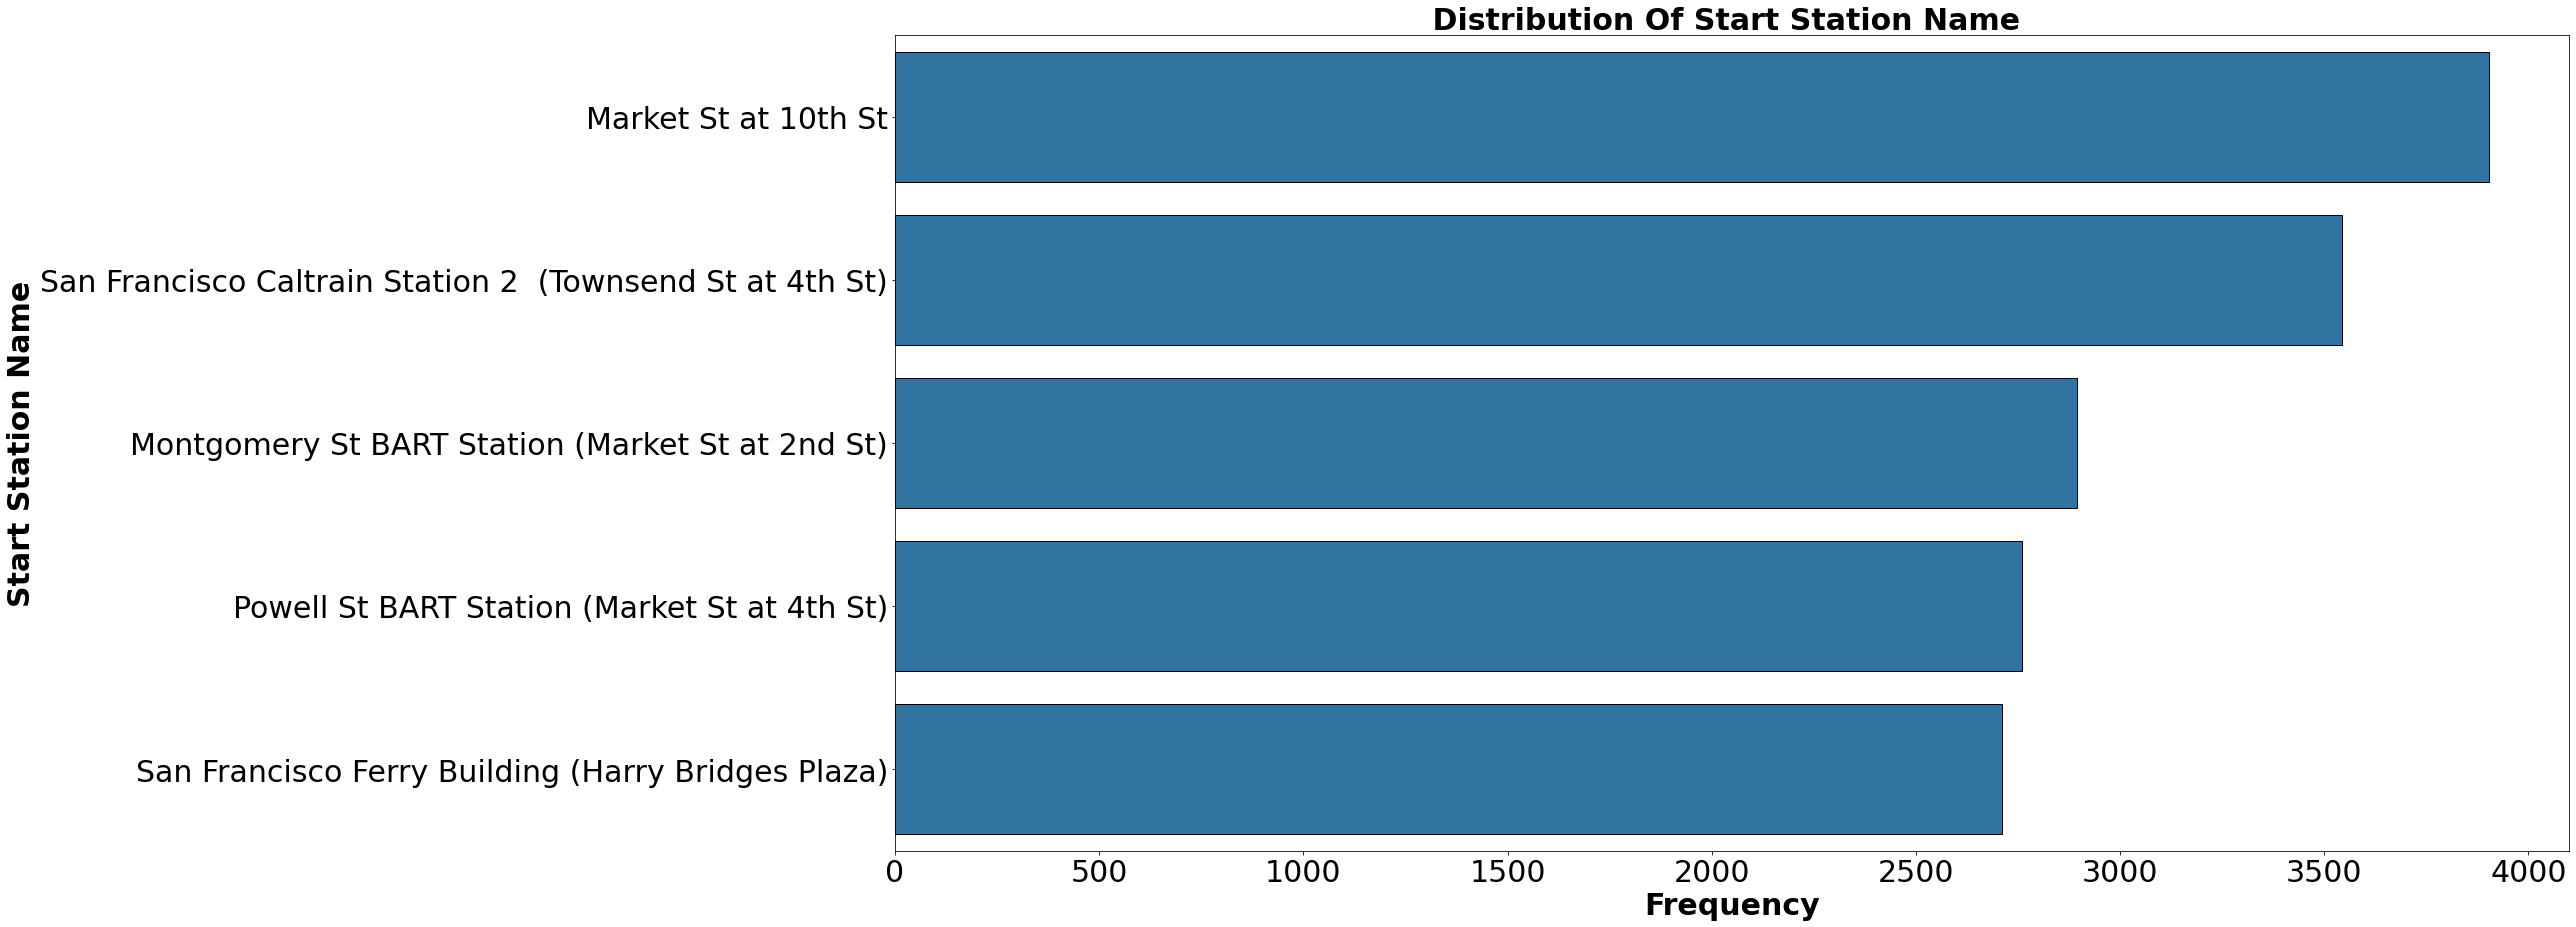

In [54]:
# plot a graph to see the distribution and examine hierachy of top5
start_station_order = df_top5['start_station_name'].value_counts().index

myCountPlot(df_top5,'start_station_name', order=start_station_order)

##### From the above graph we can see Market Street at 10th Street is the busiest of the top 5 stations

In [49]:
# checking if these stations were also the end destination for majority of rides
print(len(df['end_station_name'].value_counts()))
df['end_station_name'].value_counts()

329


San Francisco Caltrain Station 2  (Townsend St at 4th St)    4857
Market St at 10th St                                         3973
Montgomery St BART Station (Market St at 2nd St)             3647
San Francisco Ferry Building (Harry Bridges Plaza)           3368
Powell St BART Station (Market St at 4th St)                 2997
                                                             ... 
Parker Ave at McAllister St                                     9
Palm St at Willow St                                            7
21st Ave at International Blvd                                  6
16th St Depot                                                   6
Willow St at Vine St                                            5
Name: end_station_name, Length: 329, dtype: int64

In [50]:
# creating a new data group of only top 5 locations but for end locations
locs = ['San Francisco Ferry Building (Harry Bridges Plaza)','San Francisco Caltrain Station 2  (Townsend St at 4th St)','Market St at 10th St','Montgomery St BART Station (Market St at 2nd St)','Powell St BART Station (Market St at 4th St)']
df_top5_end = df.loc[df['end_station_name'].isin(locs)]

In [51]:
# test
df_top5_end

,trip_hours,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,age,member_gender,bike_share_for_all_trip
2,17.18,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,50.0,Male,No
26,0.11,2019-02-28 23:49:24.399,2019-02-28 23:55:50.284,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,6531,Customer,22.0,Male,No
45,0.20,2019-02-28 23:33:21.095,2019-02-28 23:45:18.510,9.0,Broadway at Battery St,37.798572,-122.400869,58.0,Market St at 10th St,37.776619,-122.417385,6581,Subscriber,42.0,Male,No
81,0.08,2019-02-28 23:15:21.113,2019-02-28 23:20:15.798,356.0,Valencia St at Clinton Park,37.769188,-122.422285,58.0,Market St at 10th St,37.776619,-122.417385,5938,Subscriber,30.0,Female,No
87,0.60,2019-02-28 22:42:05.215,2019-02-28 23:17:56.967,78.0,Folsom St at 9th St,37.773717,-122.411647,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,5411,Subscriber,50.0,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183334,0.26,2019-02-01 02:09:00.379,2019-02-01 02:24:18.488,133.0,Valencia St at 22nd St,37.755213,-122.420975,58.0,Market St at 10th St,37.776619,-122.417385,3392,Subscriber,22.0,Male,No
183335,0.26,2019-02-01 02:08:44.240,2019-02-01 02:24:12.014,133.0,Valencia St at 22nd St,37.755213,-122.420975,58.0,Market St at 10th St,37.776619,-122.417385,5166,Subscriber,22.0,Female,No
183378,0.18,2019-02-01 00:53:36.143,2019-02-01 01:04:35.371,47.0,4th St at Harrison St,37.780955,-122.399749,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,4960,Subscriber,37.0,Other,No
183399,0.27,2019-02-01 00:12:24.247,2019-02-01 00:28:22.738,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,58.0,Market St at 10th St,37.776619,-122.417385,3392,Subscriber,29.0,Male,No


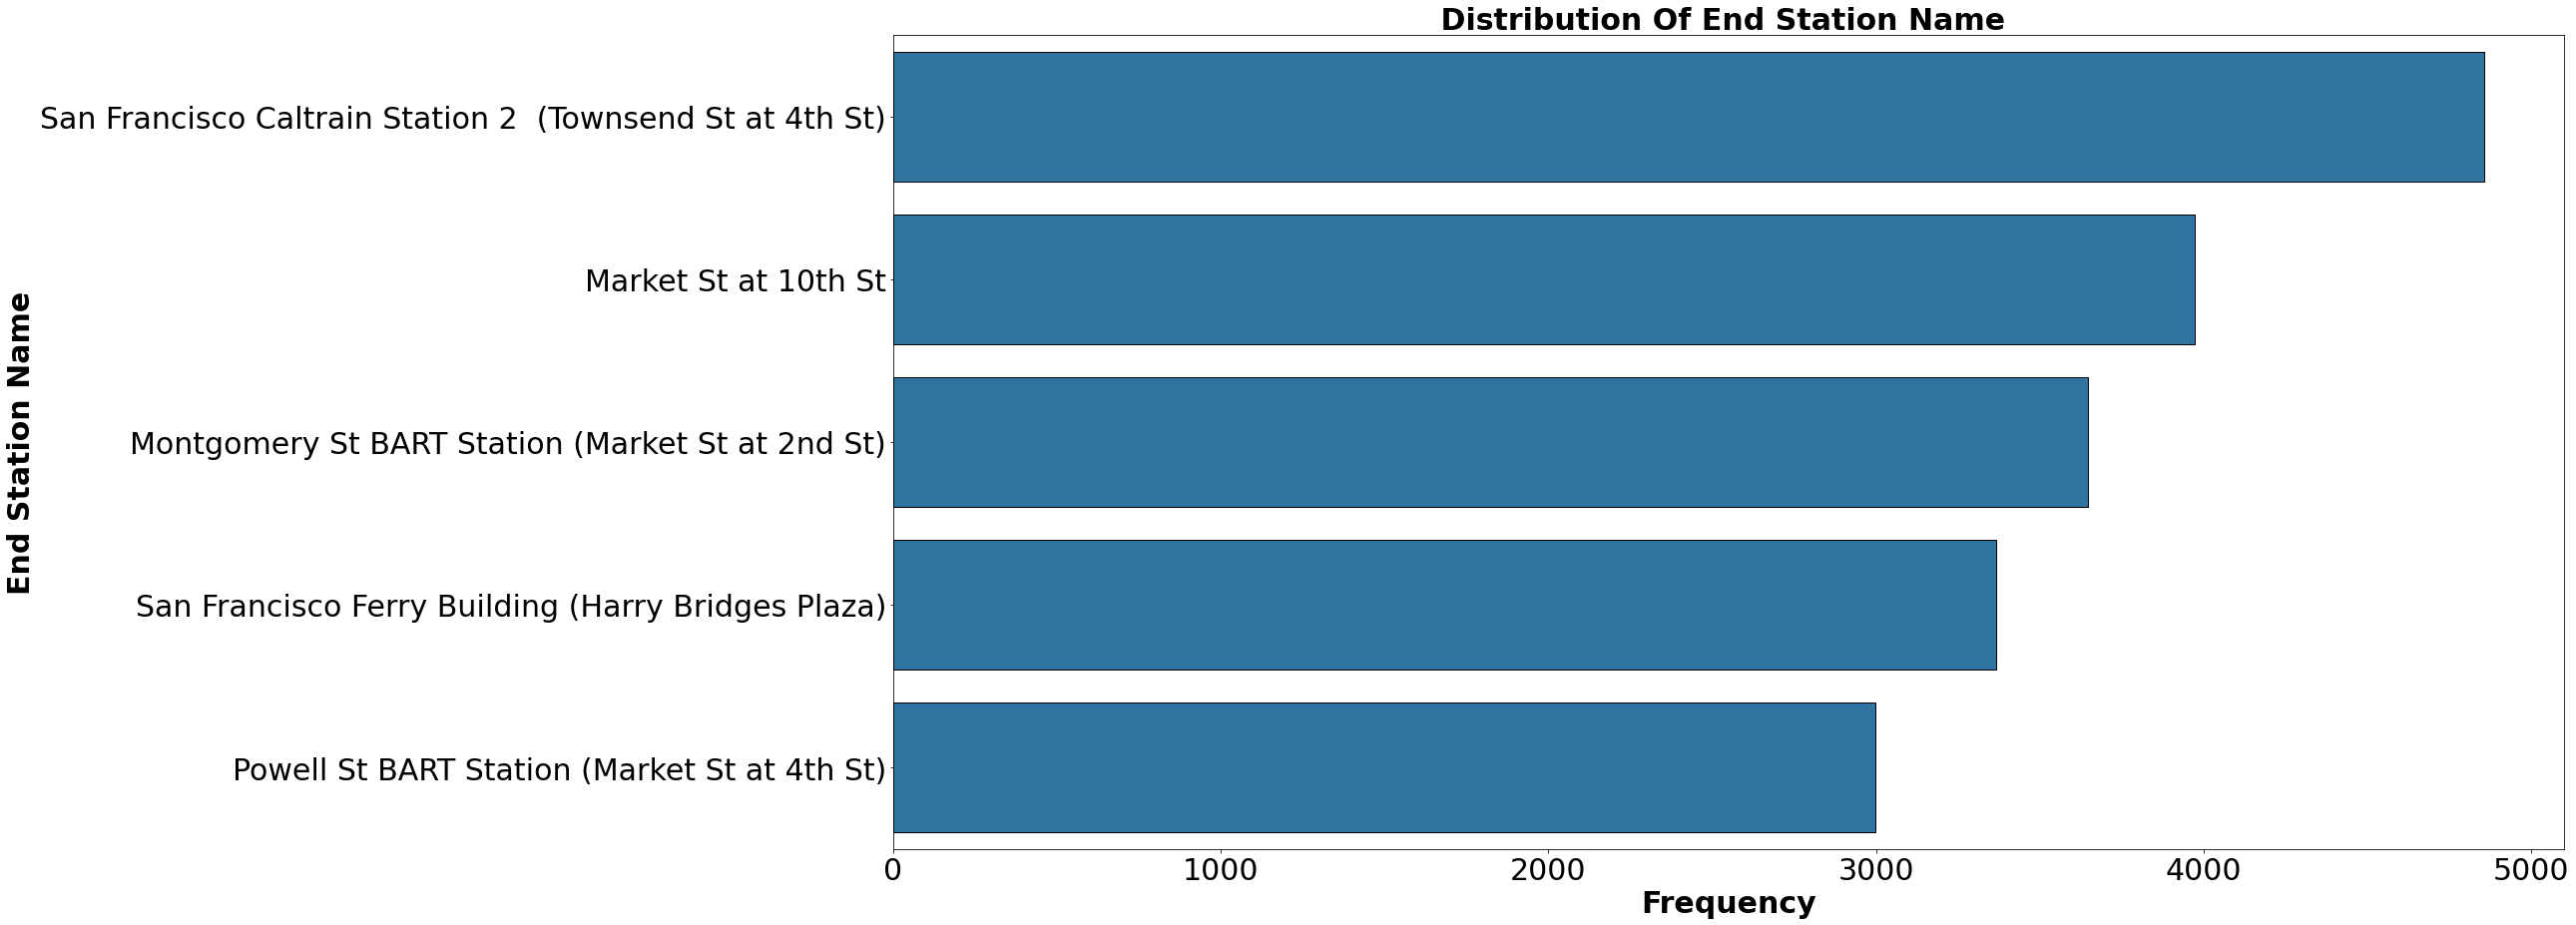

In [55]:
# plot a graph to see the distribution and examine hierachy of top5 end stations
end_station_order = df_top5_end['end_station_name'].value_counts().index

myCountPlot(df_top5_end,'end_station_name', order=end_station_order)

###### From the above graph we can see that San frascisco caltrain station is the busiest destination of the top 5 stations

In [91]:
df

,trip_hours,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,age,member_gender,bike_share_for_all_trip
0,14.50,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,38.0,Male,No
1,11.81,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,17.18,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,50.0,Male,No
3,10.14,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,33.0,Other,No
4,0.44,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,48.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,0.13,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,26.0,Male,No
183408,0.09,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,38.0,Male,No
183409,0.04,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,32.0,Male,Yes
183410,0.04,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,34.0,Male,No


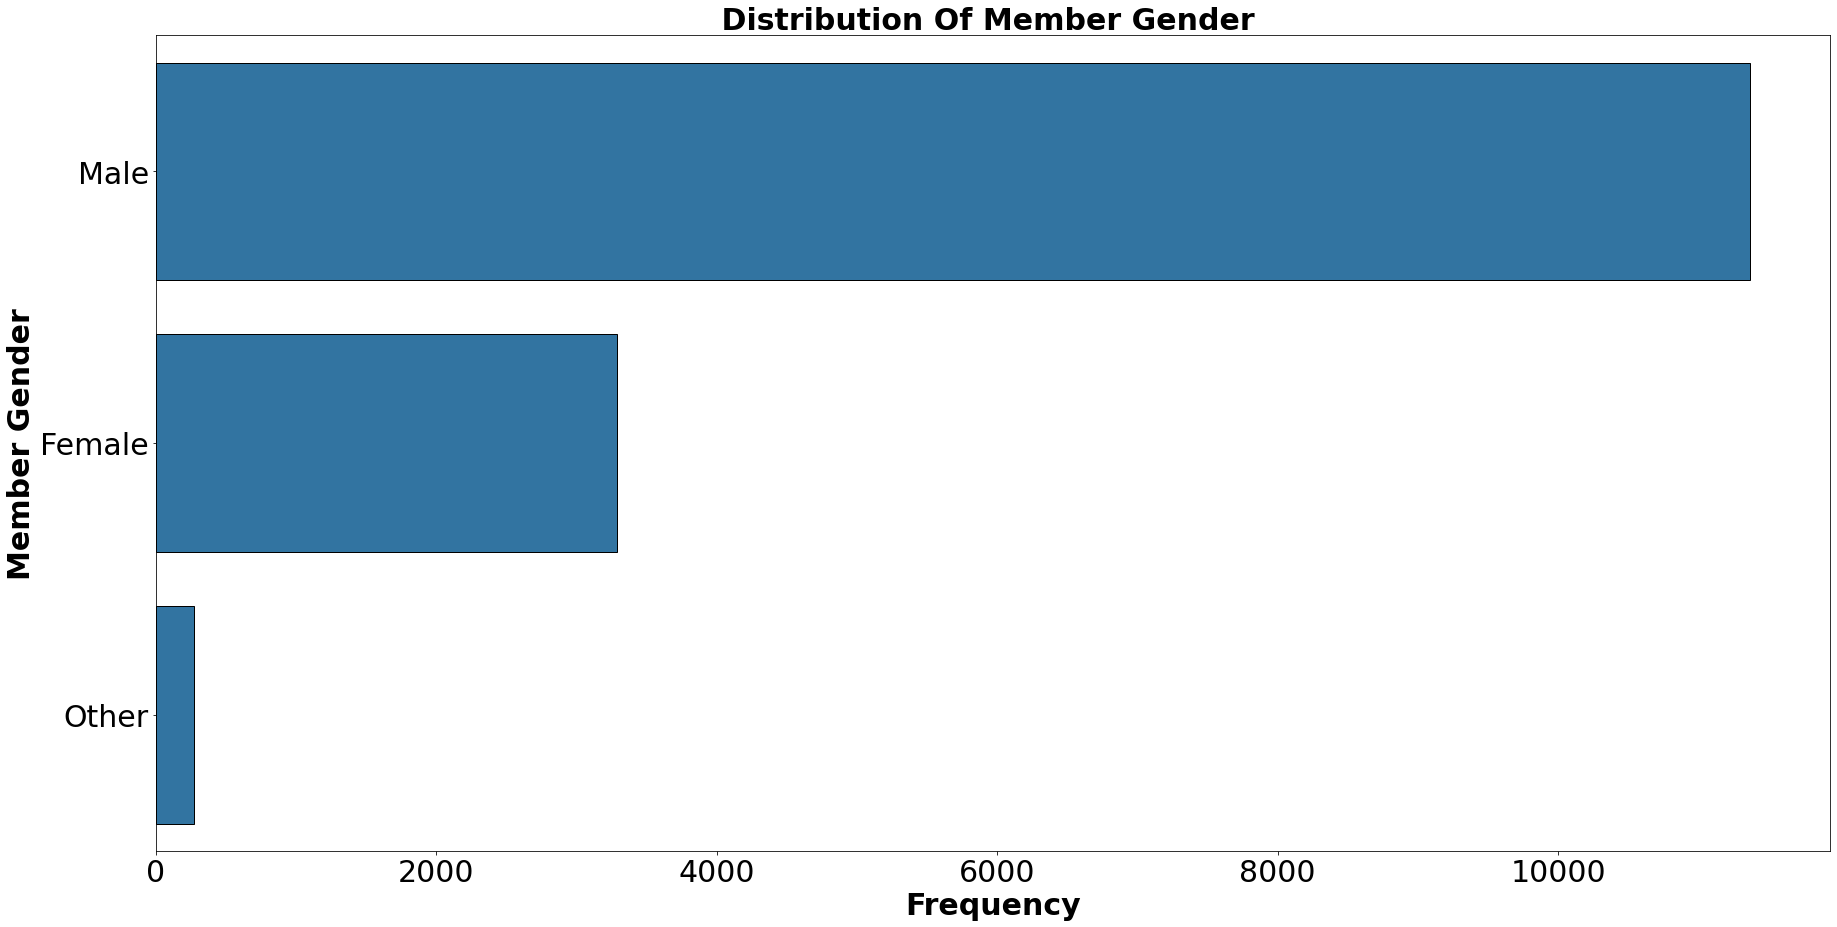

In [56]:
#distribution of Gender

myCountPlot(df_top5,'member_gender')

###### From the above plot Males are more than females 

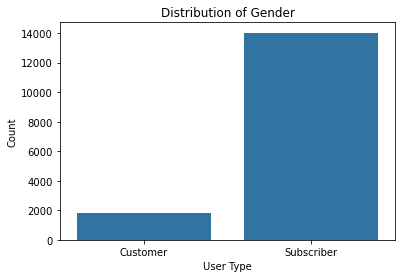

In [114]:
#distributions of user type

default_color = sb.color_palette()[0]
sb.countplot(data = df_top5, x = 'user_type',color = default_color)

plt.xlabel('User Type')
plt.ylabel('Count')
plt.title('Distribution of User Type');

###### Subscribers are so much more than the customers

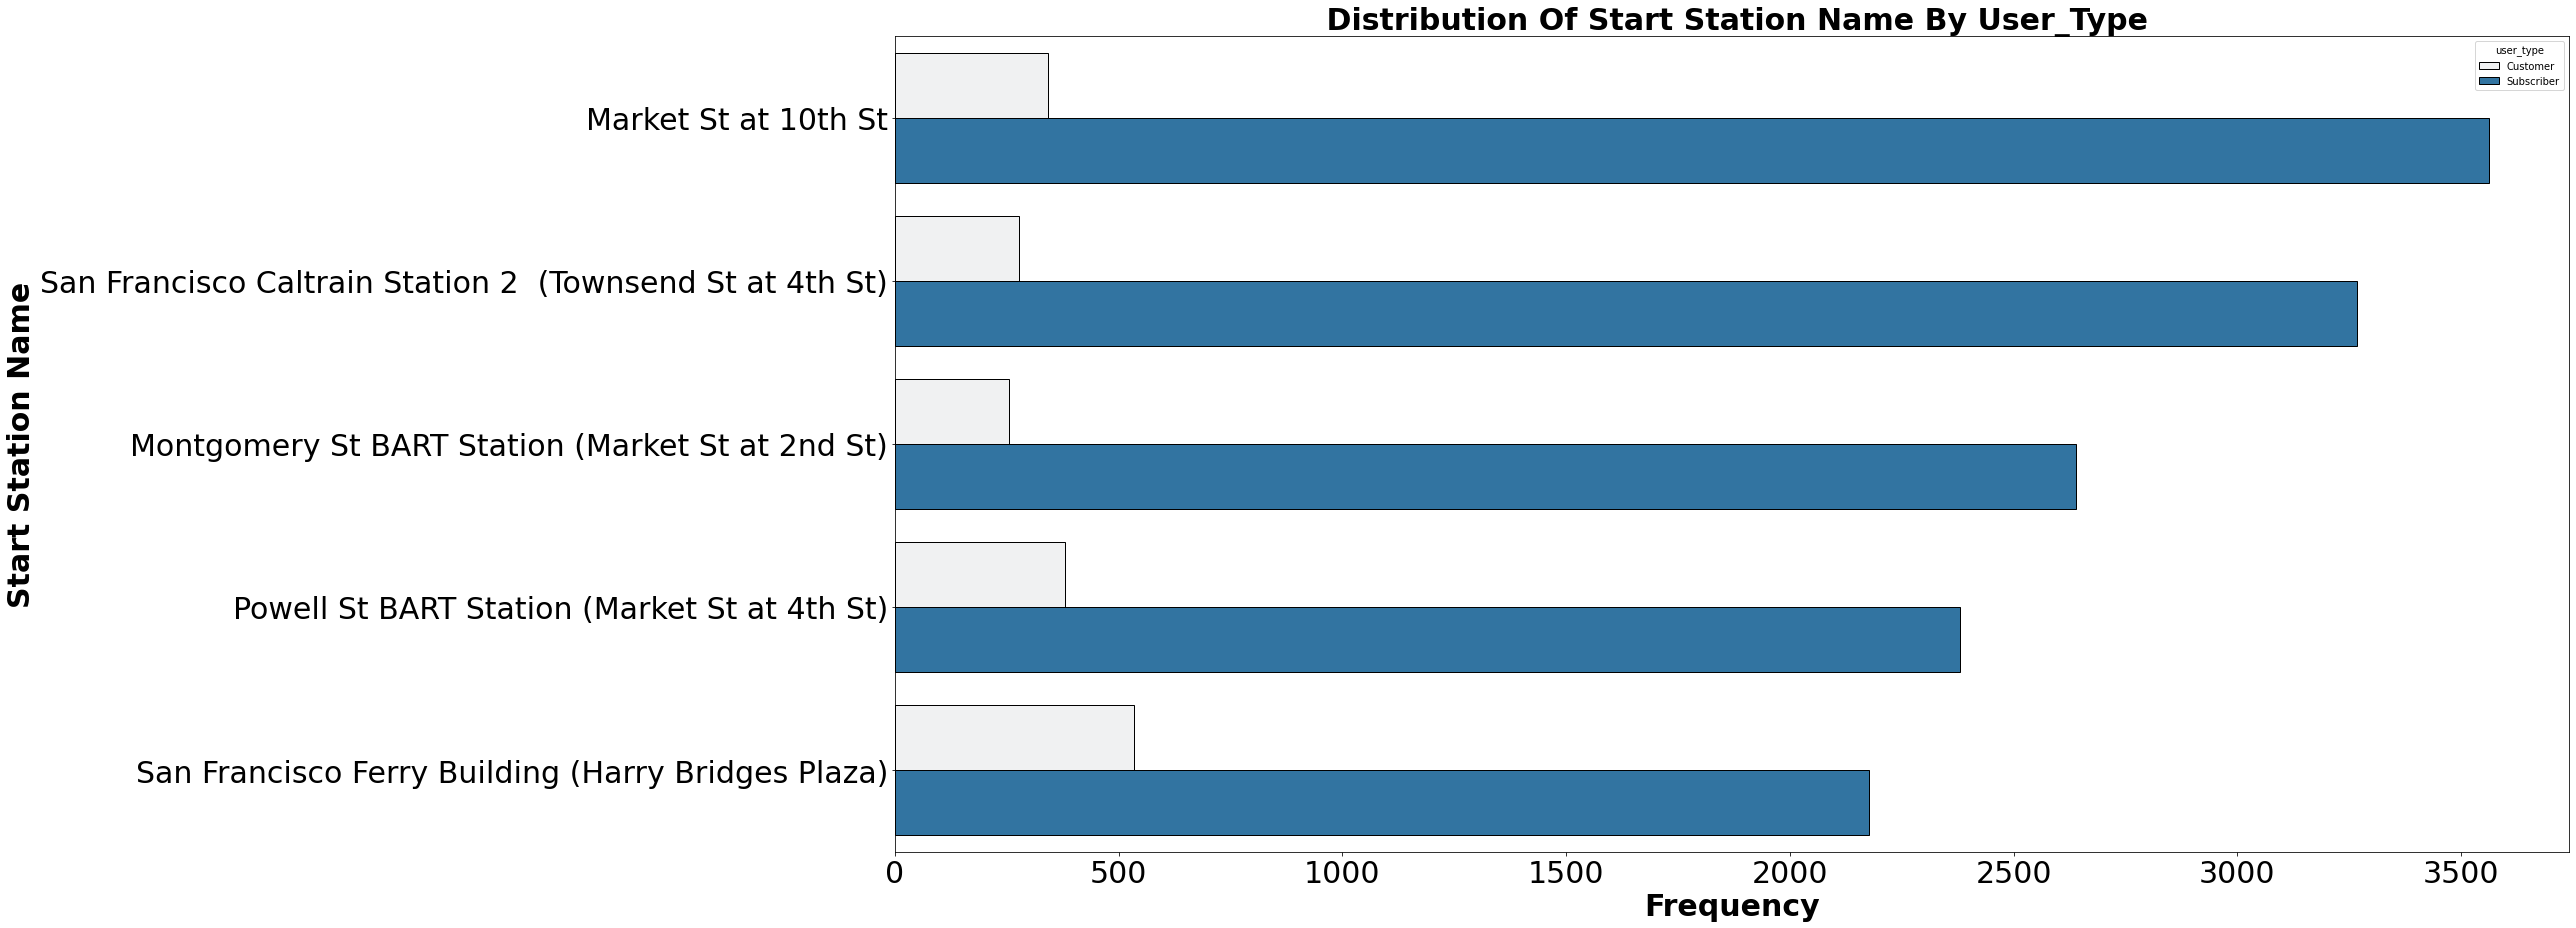

In [72]:
#distributions of user type
myCountPlot(df_top5,'start_station_name', hueVar='user_type', order=start_station_order)

###### all the top 5 stations are used more by subscribers than customers

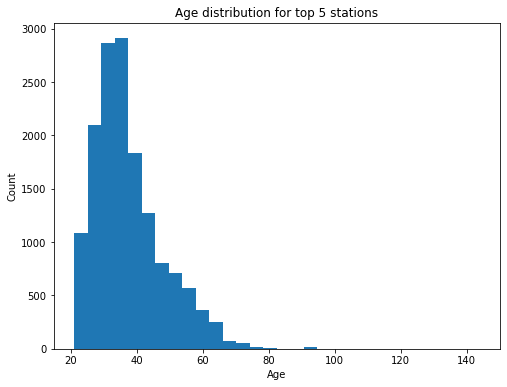

In [78]:
#based on the distribution, we can tell it's right skewed and has some outliers between 100 and 120.
plt.figure(figsize=(8,6))
#bins = np.arange(0, df_top5['age'].max()+5, 5)
plt.hist(data=df_top5, x='age', bins=30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution for top 5 stations');

######  From the distribution the majority of users fall between 30 to 40 years

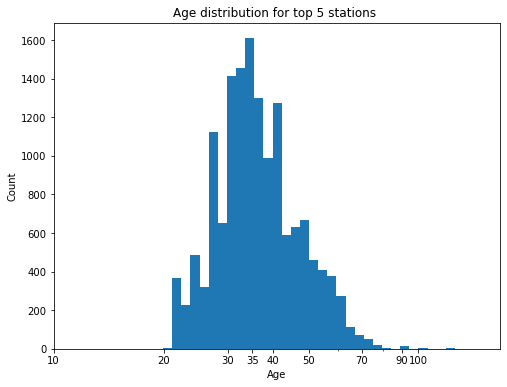

In [79]:
log_binsize = 0.025
bins = 10 ** np.arange(1.2, np.log10(df_top5['age'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 6])
plt.hist(data = df_top5, x = 'age', bins = bins)
plt.xscale('log')
plt.xticks([10,20,30,35,40,50,70,90,100], [10,20,30,35,40,50,70,90,100])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution for top 5 stations ');

###### From this distribution the age peaks at 40

In [80]:
# we need to locate the 5 longest trips in the data base 
df.nlargest(5, ['trip_hours'])

,trip_hours,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,age,member_gender,bike_share_for_all_trip
101361,23.73,2019-02-13 17:59:55.124,2019-02-14 17:43:59.954,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,98.0,Valencia St at 16th St,37.765052,-122.421866,6168,Subscriber,NaN,NaN,No
85465,23.49,2019-02-16 15:48:25.029,2019-02-17 15:17:33.080,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,368.0,Myrtle St at Polk St,37.785434,-122.419622,6301,Subscriber,41.0,Male,No
153705,23.27,2019-02-05 12:44:54.286,2019-02-06 12:01:06.631,78.0,Folsom St at 9th St,37.773717,-122.411647,345.0,Hubbell St at 16th St,37.766483,-122.398279,3405,Customer,NaN,NaN,No
127999,23.20,2019-02-09 15:16:17.537,2019-02-10 14:28:17.270,72.0,Page St at Scott St,37.772406,-122.435650,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5561,Customer,32.0,Male,No
112435,23.17,2019-02-11 16:25:33.069,2019-02-12 15:35:40.956,77.0,11th St at Natoma St,37.773507,-122.416040,344.0,16th St Depot,37.766349,-122.396292,1842,Customer,34.0,Male,No


In [81]:
# creating a new data group of only top 5 locations but for end locations
locs = [23.73,23.49,23.27,23.20,23.17]
df_top5_trips = df.loc[df['trip_hours'].isin(locs)]
 

In [82]:
#checking the longest trip
df.loc[df['trip_hours'].idxmax()]

trip_hours                                                        23.73
start_time                                   2019-02-13 17:59:55.124000
end_time                                     2019-02-14 17:43:59.954000
start_station_id                                                    5.0
start_station_name         Powell St BART Station (Market St at 5th St)
start_station_latitude                                        37.783899
start_station_longitude                                     -122.408445
end_station_id                                                     98.0
end_station_name                                 Valencia St at 16th St
end_station_latitude                                          37.765052
end_station_longitude                                       -122.421866
bike_id                                                            6168
user_type                                                    Subscriber
age                                                             

###### longest trip took approximately 24 hours

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- So the bulk of my analysis for this project was going to based on the top 5 busiest stations. In order to carry this out I had to locate the top 5 busiest stations and create a subdataset for them alone. 
-  I also looked at the genger category and found out that there are more male users than female users as was ecpected.
-  I also did some analysis on User type and found out that subscribers are more than customers by a lot( further investigation would have to be carried out as to why the difference is so large

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>  so far in my exploration I have had to perform a few operations in order to generate a more accurate analysis. 
- For example in the age column which was fomerly member birth year, I had convert the birth years of each user to the age as age is a more convenient data to work with than year of birth.
- I also had to change the data type of start time and end time to datetime from strings ( I wasnt sure yet if I was going to be using this column or not). 
- lastly I had to change the duration of the trip from seconds to hours as it makes more sense than having it in seconds

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [83]:
# for this section i will only be considering the first 500 rows of the my df_top5 dataset
df_top5_500 = df_top5.head(500)


In [84]:
df_top5_500

,trip_hours,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,age,member_gender,bike_share_for_all_trip
0,14.50,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,38.0,Male,No
38,0.30,2019-02-28 23:31:16.139,2019-02-28 23:49:02.792,58.0,Market St at 10th St,37.776619,-122.417385,145.0,29th St at Church St,37.743684,-122.426806,5938,Subscriber,30.0,Female,No
42,0.43,2019-02-28 23:20:24.089,2019-02-28 23:46:19.019,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,5411,Subscriber,50.0,Male,No
54,0.11,2019-02-28 23:30:52.471,2019-02-28 23:37:33.955,58.0,Market St at 10th St,37.776619,-122.417385,62.0,Victoria Manalo Draves Park,37.777791,-122.406432,5407,Subscriber,32.0,Female,No
63,0.07,2019-02-28 23:28:42.709,2019-02-28 23:32:41.769,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,343.0,Bryant St at 2nd St,37.783172,-122.393572,5731,Subscriber,36.0,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5283,0.07,2019-02-28 13:33:51.382,2019-02-28 13:37:52.516,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,5382,Subscriber,50.0,Female,No
5287,0.22,2019-02-28 13:23:24.397,2019-02-28 13:36:55.009,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,4644,Subscriber,55.0,Male,Yes
5293,0.04,2019-02-28 13:33:54.312,2019-02-28 13:36:36.513,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,5804,Subscriber,42.0,Male,No
5303,1.09,2019-02-28 12:28:09.575,2019-02-28 13:33:34.742,58.0,Market St at 10th St,37.776619,-122.417385,72.0,Page St at Scott St,37.772406,-122.435650,5000,Subscriber,33.0,Male,No


In [85]:
# dropping missing vales from age column
df_top5_500 = df_top5_500.dropna(subset=['age'])

In [86]:
# dropping missing vales from trip hours column
df_top5_500 = df_top5_500.dropna(subset=['trip_hours'])

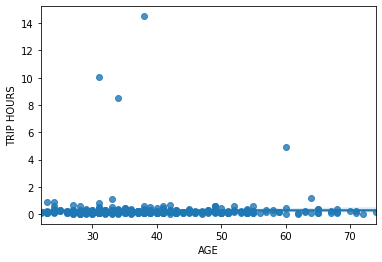

In [87]:
# i will be checking correlation between age and trip hours

sb.regplot(data = df_top5_500, x = 'age', y = 'trip_hours',);
plt.xlabel('AGE')
plt.ylabel('TRIP HOURS');

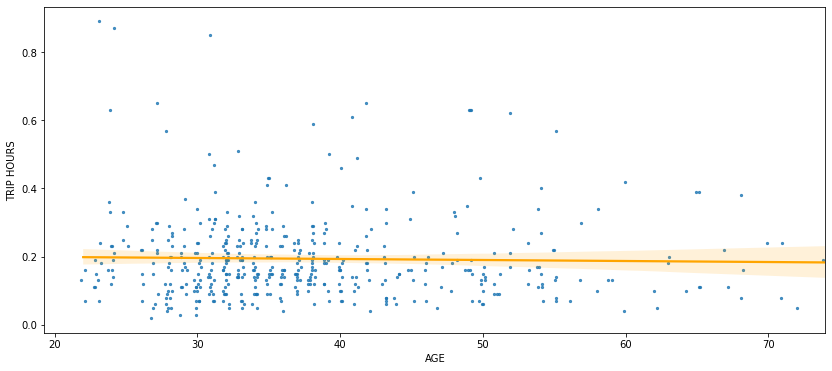

In [137]:
# correlation between age and trip hours but to exclude outliers
fig = plt.figure(figsize=(14,6))
sb.regplot(data = df_top5_500.query('trip_hours<1'), x='age', y='trip_hours', x_jitter=0.25, scatter_kws = {'s':5}, line_kws={'color':'orange'} )
plt.xlabel('AGE')
plt.ylabel('TRIP HOURS');

###### From both graphs above we can tell that as age increases number of tips decreases. Also, number of trip hours decreases as age increases

C:\Users\Tekena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


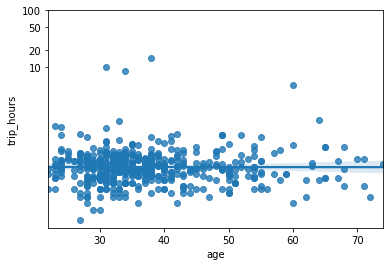

In [88]:
# scatter plot to show relationship between trip hours and age
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

sb.regplot(df_top5_500['age'], df_top5_500['trip_hours'].apply(log_trans))
tick_locs = [10, 20, 50, 100]
plt.yticks(log_trans(tick_locs), tick_locs);

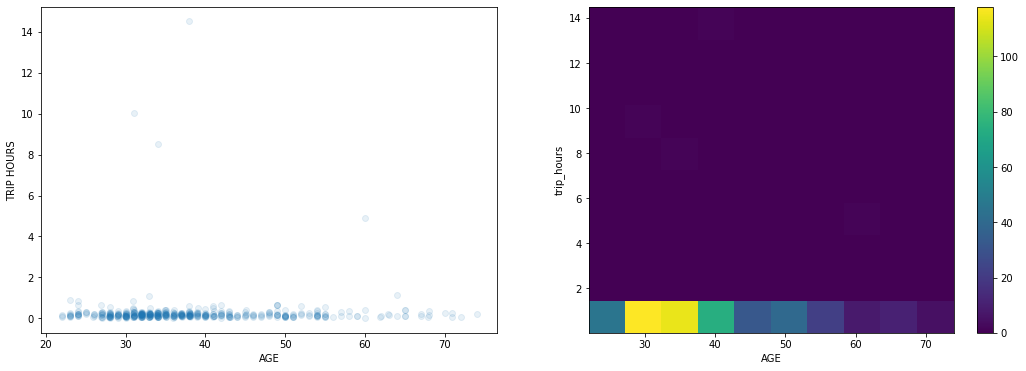

In [89]:
# scatter plot to show relationship between trip hours and age

plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)
sb.regplot(data = df_top5_500, x = 'age', y = 'trip_hours', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('AGE')
plt.ylabel('TRIP HOURS');

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
plt.hist2d(data = df_top5_500, x = 'age', y = 'trip_hours')
plt.colorbar()
plt.xlabel('AGE')
plt.ylabel('trip_hours');

###### There isn't any noticable correlation from the above graphs

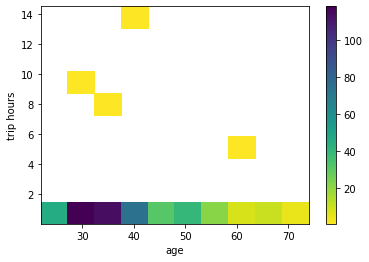

In [90]:
# scatter plot to show relationship between trip hours and age
plt.hist2d(data = df_top5_500, x = 'age', y = 'trip_hours', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('age')
plt.ylabel('trip hours');

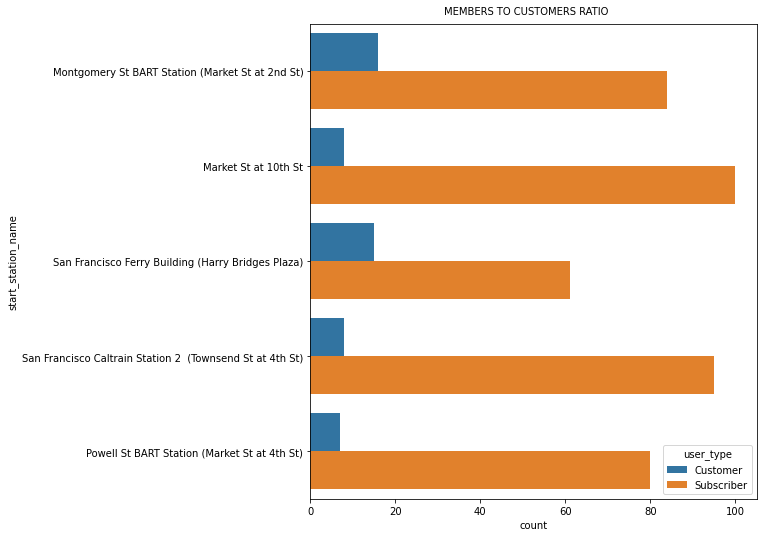

In [91]:
#i will be making some categorical analysis: which users use the gobikes servies more and which genders
fig = plt.figure(figsize=(8,8))
plt.subplots_adjust(top=0.95)
fig.suptitle('MEMBERS TO CUSTOMERS RATIO' , fontsize=10)

sb.countplot(data = df_top5_500, y = 'start_station_name', hue = 'user_type');


##### Graph above shows that subscribers are more than customers

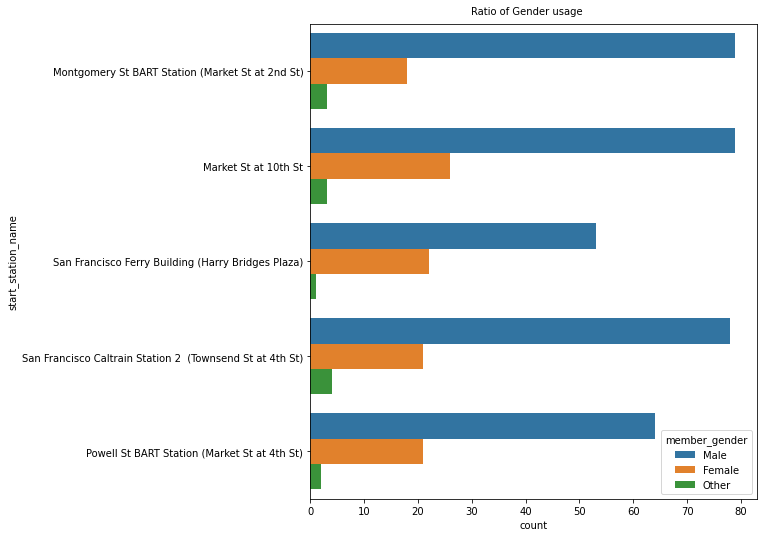

In [92]:
fig = plt.figure(figsize=(8,8))
plt.subplots_adjust(top=0.95)
fig.suptitle('Ratio of Gender usage' , fontsize=10)

sb.countplot(data = df_top5_500, y = 'start_station_name', hue = 'member_gender');

###### Graph above shows Males are make up the majority of users in top 5 stations

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
> For this section i created a new subdataset of the top 500 of my df_top5 dataset which i used to perform my analysis
- So i considered the relationship betwen age column and trip hours but there were missing values which were messing the the plot so i had to drop those values.
- Most of the ages fall between 30 to 40
- Males seem to have a lot more trips than the females

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I couldnt really determine the correlation between age and trip hours!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [97]:
# using regular expressions spaces with line breaks
df_top5_500 ['start_station_name']=df_top5_500['start_station_name'].str.replace('(','\n(', regex=False)

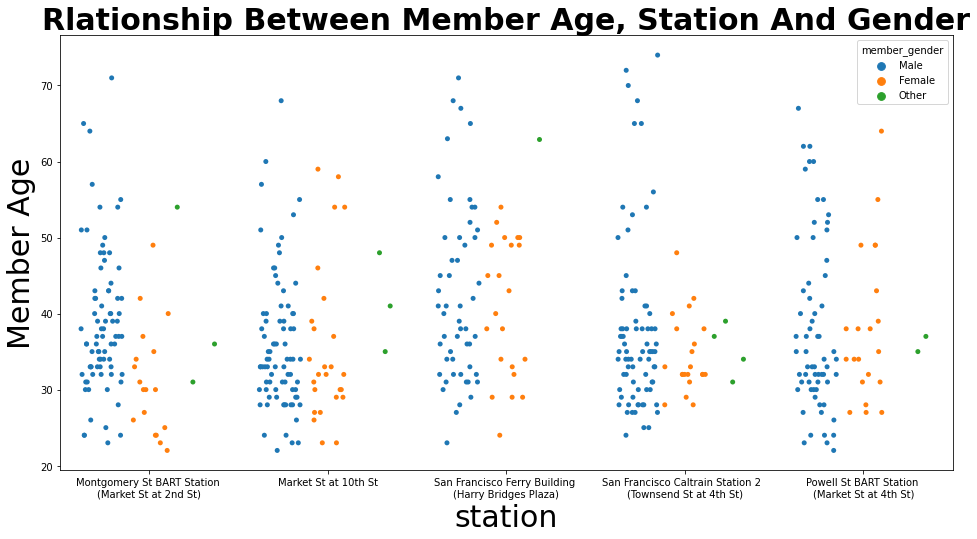

In [111]:
#graph to show relationship between member age, station and gender
plt.figure(figsize = (16,8))

sb.stripplot(data = df_top5_500, x='start_station_name', y='age', hue='member_gender', size=5, jitter=0.35, dodge=True)
plt.title('Rlationship between member age, station and gender'.title(), fontsize=30, fontweight='bold')
plt.ylabel('member age'.title(), fontsize = 30)
plt.xlabel('station', fontsize= 30);



###### Above graph show a number of things. We can see that San Frasisco caltrain station has the oldest user among top 5 stations. And that as age goes up number of users reduce in all stations

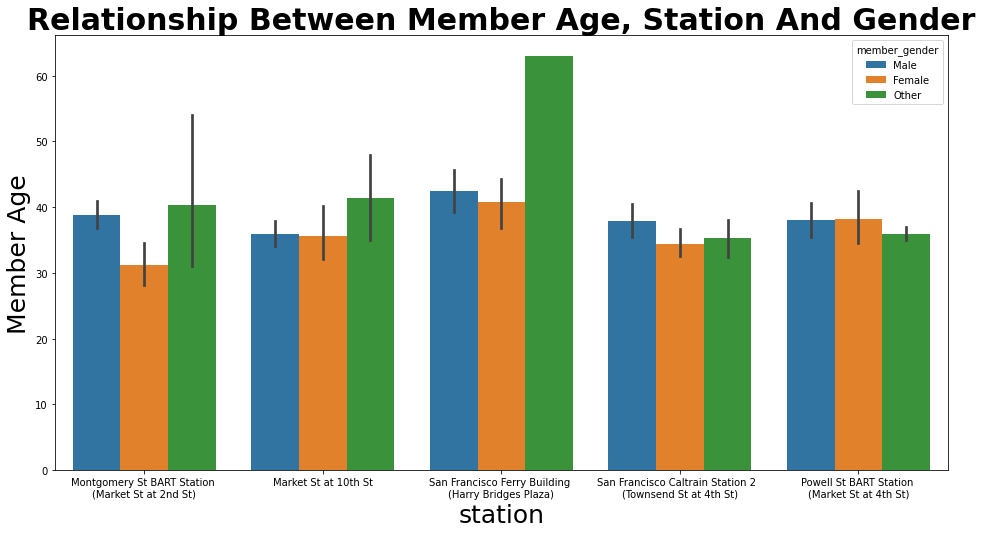

In [118]:
plt.figure(figsize=(16,8))

sb.barplot(data=df_top5_500, x='start_station_name', y='age', hue = 'member_gender')
plt.title('relationship between member age, station and gender'.title(), fontsize=30, fontweight = 'bold')
plt.ylabel('member age'.title(), fontsize = 25)
plt.xlabel('station', fontsize=25);

###### Graph shows us similar results to graph above

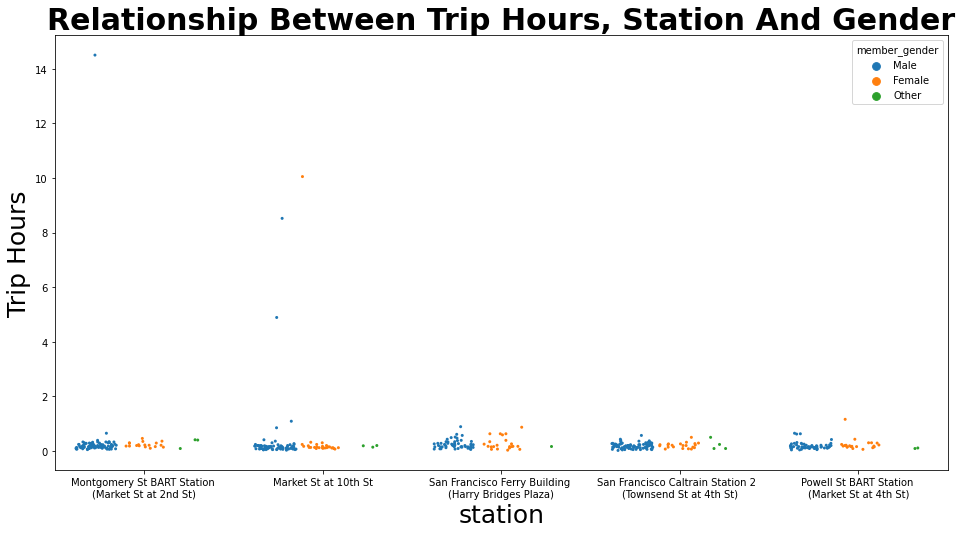

In [127]:
plt.figure(figsize = (16,8))

sb.stripplot(data=df_top5_500, x='start_station_name', y='trip_hours', hue='member_gender', size =3, jitter=0.35, dodge=True)

plt.title('relationship between trip hours, station and gender'.title(), fontsize=30, fontweight = 'bold')
plt.ylabel('Trip Hours'.title(), fontsize = 25)
plt.xlabel('station', fontsize=25);


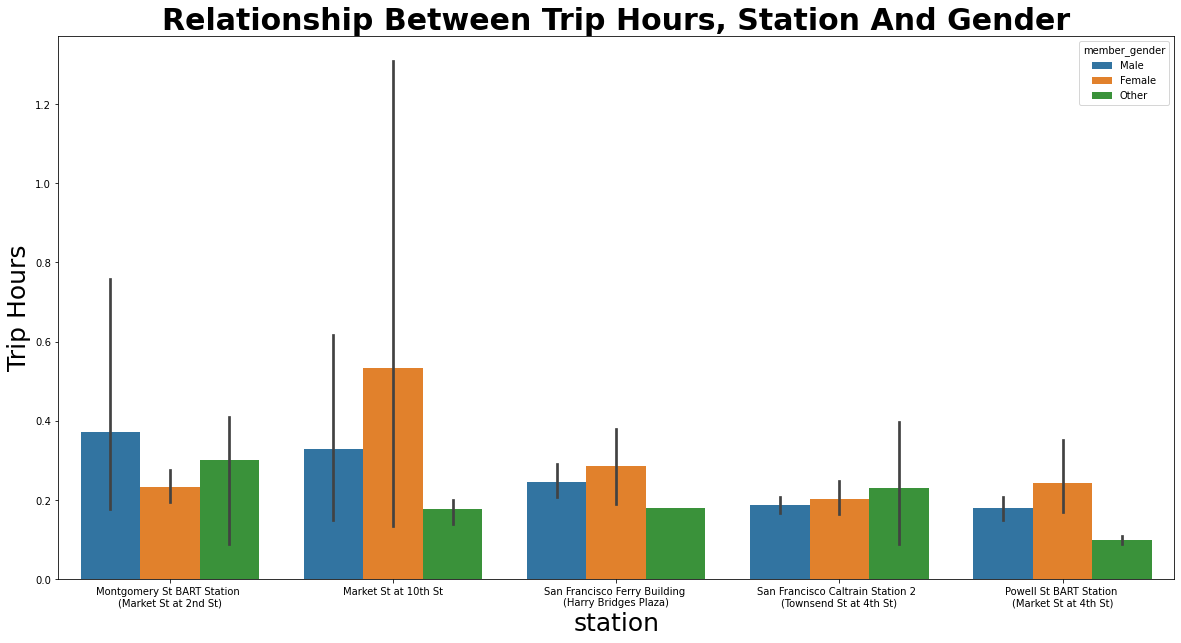

In [133]:
plt.figure(figsize=(20,10))

sb.barplot(data = df_top5_500, x='start_station_name', y='trip_hours', hue='member_gender')
plt.title('relationship between Trip Hours, station and gender'.title(), fontsize=30, fontweight = 'bold')
plt.ylabel('Trip Hours'.title(), fontsize = 25)
plt.xlabel('station', fontsize=25);

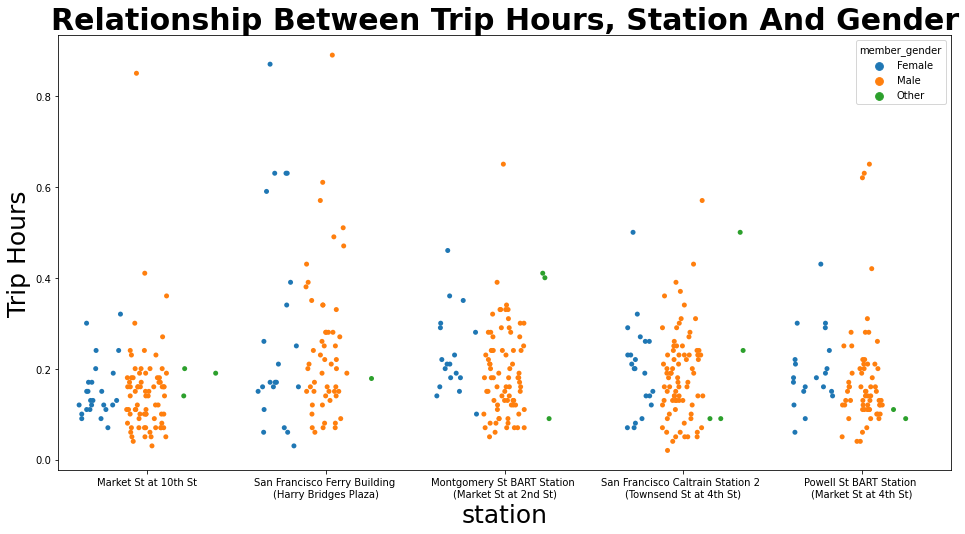

In [135]:
plt.figure(figsize=(16,8))

sb.stripplot(data = df_top5_500.query('trip_hours<1'), x='start_station_name', y='trip_hours', hue='member_gender', size =5, jitter=0.35, dodge=True )


plt.title('relationship between trip hours, station and gender'.title(), fontsize=30, fontweight = 'bold')
plt.ylabel('Trip Hours'.title(), fontsize = 25)
plt.xlabel('station', fontsize=25);


##### The 3 graphs above prove that there are moremales than females. Also trips from san fracisco ferry building are usually longer than other trips

In [146]:
#saving my subdataset for my presentation
df_top5_500.to_csv('fordbike_clean.csv')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- The distribution of the age of male and female users are positive-skewed
- For the first plot for the female distribution the bin sizes were too narrow and so it appeared that the distribution was bi-modal but after adjusting the bin size it gave a more accurate representation

### Were there any interesting or surprising interactions between features?

> Men seem to be making more trips with the GoBike system than women which is expected but not at this rate

## Conclusions

> In order to arrive at this stage I had to modify the original dataset I was 
given. I changed a few column headers and the information contained. I dropped rows with incolplete data which would result unaccurate analysis. The dataset was a large one so I decided to locate the most important stations to examine only, as a result I created a subset of the the 5 most busiest stations by comparing a list of the most occuring start and end stations. I then used this new table for my exploration. 
- From my eplorations I deduced that there are more subcribers than customers probably as a result of the good servies offered by GoBike systems that would make customers want to become members 
- I also discovered that most of these subscribers are males 
- And a majority of those males are in their 30's and 40's while a majority of women are in their 30's 

#### References
- Github
- w3schools
- stackoverflow
- geeksforgeeks